In [1]:
# starting web3 operations
import numpy as np
import json
from web3 import Web3
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

ganache_url = "HTTP://127.0.0.1:8545"
# ropsten_url ="https://ropsten.infura.io/v3/6072fdc3b95c407caa681f63ebaf72b8"
web3 = Web3(Web3.HTTPProvider(ganache_url))
# web3 = Web3(Web3.HTTPProvider(ropsten_url))
web3.isConnected()

True

In [2]:
abi = json.loads('[ { "inputs": [ { "internalType": "int256[]", "name": "wnum", "type": "int256[]" }, { "internalType": "int256[]", "name": "wden", "type": "int256[]" }, { "internalType": "int256", "name": "bnum", "type": "int256" }, { "internalType": "int256", "name": "bden", "type": "int256" }, { "internalType": "int256", "name": "lrn", "type": "int256" }, { "internalType": "int256", "name": "lrd", "type": "int256" } ], "stateMutability": "nonpayable", "type": "constructor" }, { "inputs": [ { "internalType": "int256[]", "name": "yd_num", "type": "int256[]" }, { "internalType": "int256[]", "name": "yd_den", "type": "int256[]" } ], "name": "get_delta_b", "outputs": [], "stateMutability": "nonpayable", "type": "function" }, { "inputs": [ { "internalType": "int256", "name": "a", "type": "int256" }, { "internalType": "int256", "name": "b", "type": "int256" }, { "internalType": "int256", "name": "c", "type": "int256" }, { "internalType": "int256", "name": "d", "type": "int256" } ], "name": "get_delta_w1", "outputs": [ { "internalType": "int256", "name": "", "type": "int256" }, { "internalType": "int256", "name": "", "type": "int256" } ], "stateMutability": "nonpayable", "type": "function" }, { "inputs": [ { "internalType": "int256[]", "name": "num", "type": "int256[]" }, { "internalType": "int256[]", "name": "den", "type": "int256[]" } ], "name": "get_delta_w2", "outputs": [], "stateMutability": "nonpayable", "type": "function" }, { "inputs": [ { "internalType": "int256", "name": "a", "type": "int256" }, { "internalType": "int256", "name": "b", "type": "int256" }, { "internalType": "int256", "name": "c", "type": "int256" }, { "internalType": "int256", "name": "d", "type": "int256" } ], "name": "get_mse1", "outputs": [ { "internalType": "int256", "name": "", "type": "int256" }, { "internalType": "int256", "name": "", "type": "int256" } ], "stateMutability": "nonpayable", "type": "function" }, { "inputs": [ { "internalType": "int256[]", "name": "num", "type": "int256[]" }, { "internalType": "int256[]", "name": "den", "type": "int256[]" } ], "name": "get_mse2", "outputs": [ { "internalType": "int256", "name": "", "type": "int256" }, { "internalType": "int256", "name": "", "type": "int256" } ], "stateMutability": "nonpayable", "type": "function" }, { "inputs": [ { "internalType": "int256", "name": "lrn", "type": "int256" }, { "internalType": "int256", "name": "lrd", "type": "int256" }, { "internalType": "int256", "name": "dbnum", "type": "int256" }, { "internalType": "int256", "name": "dbden", "type": "int256" } ], "name": "get_new_bias", "outputs": [], "stateMutability": "nonpayable", "type": "function" }, { "inputs": [ { "internalType": "int256[]", "name": "delw_num", "type": "int256[]" }, { "internalType": "int256[]", "name": "delw_den", "type": "int256[]" } ], "name": "get_new_weights", "outputs": [], "stateMutability": "nonpayable", "type": "function" }, { "inputs": [ { "internalType": "int256[]", "name": "xnum", "type": "int256[]" }, { "internalType": "int256[]", "name": "xden", "type": "int256[]" } ], "name": "get_y_hat", "outputs": [], "stateMutability": "nonpayable", "type": "function" }, { "inputs": [], "name": "print_larger", "outputs": [ { "internalType": "int256", "name": "", "type": "int256" } ], "stateMutability": "view", "type": "function" }, { "inputs": [], "name": "reset_delta_w", "outputs": [], "stateMutability": "nonpayable", "type": "function" }, { "inputs": [], "name": "reset_y_diff", "outputs": [], "stateMutability": "nonpayable", "type": "function" }, { "inputs": [], "name": "reset_y_hat", "outputs": [], "stateMutability": "nonpayable", "type": "function" }, { "inputs": [], "name": "reset_z_arrays", "outputs": [], "stateMutability": "nonpayable", "type": "function" }, { "inputs": [], "name": "set_add_array", "outputs": [ { "internalType": "int256", "name": "", "type": "int256" }, { "internalType": "int256", "name": "", "type": "int256" } ], "stateMutability": "view", "type": "function" }, { "inputs": [], "name": "set_delta_b", "outputs": [ { "internalType": "int256", "name": "", "type": "int256" }, { "internalType": "int256", "name": "", "type": "int256" } ], "stateMutability": "view", "type": "function" }, { "inputs": [], "name": "set_delta_w", "outputs": [ { "internalType": "int256[]", "name": "", "type": "int256[]" }, { "internalType": "int256[]", "name": "", "type": "int256[]" } ], "stateMutability": "view", "type": "function" }, { "inputs": [], "name": "set_delta_w1", "outputs": [ { "internalType": "int256", "name": "", "type": "int256" }, { "internalType": "int256", "name": "", "type": "int256" } ], "stateMutability": "view", "type": "function" }, { "inputs": [], "name": "set_delta_w2", "outputs": [ { "internalType": "int256[]", "name": "", "type": "int256[]" }, { "internalType": "int256[]", "name": "", "type": "int256[]" } ], "stateMutability": "view", "type": "function" }, { "inputs": [], "name": "set_mse1", "outputs": [ { "internalType": "int256", "name": "", "type": "int256" }, { "internalType": "int256", "name": "", "type": "int256" } ], "stateMutability": "view", "type": "function" }, { "inputs": [], "name": "set_mse2", "outputs": [ { "internalType": "int256", "name": "", "type": "int256" }, { "internalType": "int256", "name": "", "type": "int256" } ], "stateMutability": "view", "type": "function" }, { "inputs": [], "name": "set_multiplier", "outputs": [ { "internalType": "int256[]", "name": "", "type": "int256[]" }, { "internalType": "int256[]", "name": "", "type": "int256[]" } ], "stateMutability": "view", "type": "function" }, { "inputs": [], "name": "set_new_parameters", "outputs": [ { "internalType": "int256[]", "name": "", "type": "int256[]" }, { "internalType": "int256[]", "name": "", "type": "int256[]" }, { "internalType": "int256", "name": "", "type": "int256" }, { "internalType": "int256", "name": "", "type": "int256" } ], "stateMutability": "view", "type": "function" }, { "inputs": [], "name": "set_y_diff", "outputs": [ { "internalType": "int256[]", "name": "", "type": "int256[]" }, { "internalType": "int256[]", "name": "", "type": "int256[]" } ], "stateMutability": "view", "type": "function" }, { "inputs": [], "name": "set_y_hat", "outputs": [ { "internalType": "int256[]", "name": "", "type": "int256[]" }, { "internalType": "int256[]", "name": "", "type": "int256[]" } ], "stateMutability": "view", "type": "function" } ]')
cont_address = "0xaA7b8167bD2481b0E7C226dFfA6CA6276Ae74962"
contract = web3.eth.contract(address=cont_address,abi=abi)

In [3]:
account1 = "0x37bfB436392DaAE0E91EdcD9c4128FBcADF3919d"
private_key1 = "e72044de2331844a3c0232dc23d43fb8ca4f555854b4da07e2fb530d003e5e2d"
account2 = "0xfbD8f1F5878b0b5b3E627e7cc14617b05B582867"
private_key2="56c8f569b23a423f9d66d46f86f7ada7ba0d28dfba03c34f661bb15358b042bb"

In [4]:
#try to see the parameters from the constructor


In [5]:
# contract.functions.set_bias().call()
# xn = np.full((500),1).tolist()
# xd = np.full((500),3).tolist()
# yn = np.full((500),1).tolist()
# yd = np.full((500),5).tolist()

In [6]:
#    parameters in smart contract definition
#    int lcm ; int sub_num; int sub_den;int[] z_num; int[] z_den;int[] yh_num; int[] yh_den;
#    int[] yh_sub_num; int[] yh_sub_den; int[] del_w_num; int[] del_w_den; int del_b_num; int del_b_den;
#    int[] _wnum; int[] _wden; int _b_num; int _b_den; int lr_num; int lr_den;

In [28]:
def get_yhat(xn,xd,account, private_key,contract):
    nonce = web3.eth.getTransactionCount(account)
    tx_store = contract.functions.get_y_hat(
        xn,xd
         ).buildTransaction({
        'gas': 3000000,
        'gasPrice': web3.toWei('100', 'gwei'),
        'from': account,
        'nonce': nonce
        })

    signed_txn = web3.eth.account.signTransaction(tx_store, private_key=private_key)
    start_time = time.time()
    tx_hash = web3.eth.sendRawTransaction(signed_txn.rawTransaction)
    tx_receipt = web3.eth.waitForTransactionReceipt(tx_hash)
    end_time = time.time()
    return tx_receipt
    

In [8]:
def get_mse1(a,b,c,d,account, private_key,contract):
    nonce = web3.eth.getTransactionCount(account)
    tx_store = contract.functions.get_mse1(
        a,b,c,d
         ).buildTransaction({
        'gas': 3000000,
        'gasPrice': web3.toWei('1000', 'gwei'),
        'from': account,
        'nonce': nonce
        })

    signed_txn = web3.eth.account.signTransaction(tx_store, private_key=private_key)
    start_time = time.time()
    tx_hash = web3.eth.sendRawTransaction(signed_txn.rawTransaction)
    tx_receipt = web3.eth.waitForTransactionReceipt(tx_hash)
    end_time = time.time()
    return tx_receipt

In [9]:
def get_mse2(xn,xd,account, private_key,contract):
    nonce = web3.eth.getTransactionCount(account)
    tx_store = contract.functions.get_mse2(
        xn,xd
         ).buildTransaction({
        'gas': 3000000,
        'gasPrice': web3.toWei('10', 'gwei'),
        'from': account,
        'nonce': nonce
        })

    signed_txn = web3.eth.account.signTransaction(tx_store, private_key=private_key)
    start_time = time.time()
    tx_hash = web3.eth.sendRawTransaction(signed_txn.rawTransaction)
    tx_receipt = web3.eth.waitForTransactionReceipt(tx_hash)
    end_time = time.time()
    
    return tx_receipt

In [10]:
# xn = np.full((10),2).tolist()
# xd = np.full((10),100).tolist()
# yn = np.full((10),40).tolist()
# yd = np.full((10),10).tolist()

In [44]:
def reset_z(account, private_key,contract):
    nonce = web3.eth.getTransactionCount(account)
    tx_store = contract.functions.reset_z_arrays(
        
         ).buildTransaction({
        'gas': 3000000,
        'gasPrice': web3.toWei('10', 'gwei'),
        'from': account,
        'nonce': nonce
        })

    signed_txn = web3.eth.account.signTransaction(tx_store, private_key=private_key)
    start_time = time.time()
    tx_hash = web3.eth.sendRawTransaction(signed_txn.rawTransaction)
    tx_receipt = web3.eth.waitForTransactionReceipt(tx_hash)
    end_time = time.time()   

In [12]:
def get_delta_w1(a,b,c,d,account, private_key,contract):
    nonce = web3.eth.getTransactionCount(account)
    tx_store = contract.functions.get_delta_w1(
        a,b,c,d
         ).buildTransaction({
        'gas': 3000000,
        'gasPrice': web3.toWei('10', 'gwei'),
        'from': account,
        'nonce': nonce
        })

    signed_txn = web3.eth.account.signTransaction(tx_store, private_key=private_key)
    start_time = time.time()
    tx_hash = web3.eth.sendRawTransaction(signed_txn.rawTransaction)
    tx_receipt = web3.eth.waitForTransactionReceipt(tx_hash)
    end_time = time.time()   
    return tx_receipt

In [13]:
def get_delta_w2(an,bn,account, private_key,contract):
    nonce = web3.eth.getTransactionCount(account)
    tx_store = contract.functions.get_delta_w2(
        an,bn
         ).buildTransaction({
        'gas': 3000000,
        'gasPrice': web3.toWei('10', 'gwei'),
        'from': account,
        'nonce': nonce
        })

    signed_txn = web3.eth.account.signTransaction(tx_store, private_key=private_key)
    start_time = time.time()
    tx_hash = web3.eth.sendRawTransaction(signed_txn.rawTransaction)
    tx_receipt = web3.eth.waitForTransactionReceipt(tx_hash)
    end_time = time.time()   
    return tx_receipt

In [60]:
def get_delta_b(an,bn,account, private_key,contract):
    nonce = web3.eth.getTransactionCount(account)
    tx_store = contract.functions.get_delta_b(
        an,bn
         ).buildTransaction({
        'gas': 3000000,
        'gasPrice': web3.toWei('10', 'gwei'),
        'from': account,
        'nonce': nonce
        })

    signed_txn = web3.eth.account.signTransaction(tx_store, private_key=private_key)
    start_time = time.time()
    tx_hash = web3.eth.sendRawTransaction(signed_txn.rawTransaction)
    tx_receipt = web3.eth.waitForTransactionReceipt(tx_hash)
    end_time = time.time()   
    return tx_receipt

In [15]:
def get_weights(delwn,delwd,account, private_key,contract):
    nonce = web3.eth.getTransactionCount(account)
    tx_store = contract.functions.get_new_weights(
        delwn,delwd
         ).buildTransaction({
        'gas': 3000000,
        'gasPrice': web3.toWei('10', 'gwei'),
        'from': account,
        'nonce': nonce
        })

    signed_txn = web3.eth.account.signTransaction(tx_store, private_key=private_key)
    start_time = time.time()
    tx_hash = web3.eth.sendRawTransaction(signed_txn.rawTransaction)
    tx_receipt = web3.eth.waitForTransactionReceipt(tx_hash)
    end_time = time.time()   
    return tx_receipt

In [16]:
def get_bias(lrn,lrd,dbn,dbd,account, private_key,contract):
    nonce = web3.eth.getTransactionCount(account)
    tx_store = contract.functions.get_new_weights(
        delwn,delwd
         ).buildTransaction({
        'gas': 3000000,
        'gasPrice': web3.toWei('10', 'gwei'),
        'from': account,
        'nonce': nonce
        })

    signed_txn = web3.eth.account.signTransaction(tx_store, private_key=private_key)
    start_time = time.time()
    tx_hash = web3.eth.sendRawTransaction(signed_txn.rawTransaction)
    tx_receipt = web3.eth.waitForTransactionReceipt(tx_hash)
    end_time = time.time()   
    return tx_receipt

In [18]:
# xnum
# get_yhat(xn,xd,yfn,yfd,account, private_key,contract)
# get_mse1(a,b,c,d,account, private_key,contract)
# get_mse2(xn,xd,account, private_key,contract)
# get_delta_w1(a,b,c,d,account, private_key,contract)
# get_delta_w2(an,bn,account, private_key,contract)
# get_delta_b(ydn,ydd,account, private_key,contract)
# get_weights(delwn,delwd,account, private_key,contract)
# get_bias(lrn,lrd,dbn,dbd,account, private_key,contract)

In [19]:
# n = 500
# lrn = 1
# lrd = 100

In [20]:
# function2(n,lrn,lrd,account1, private_key1,contract)

In [21]:
# get the dataset
data = load_diabetes()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# normalize to fractions for numerator
X_train_num = np.dot(X_train,1000).astype(int)
X_test_num = np.dot(X_test,1000).astype(int)
y_train_num = y_train.astype(int)
y_test_num = y_test.astype(int)

#normalize tof ractions in denominator
X_train_den = np.full(X_train.shape, 1000) 
X_test_den = np.full(X_test.shape, 1000) 
y_train_den = np.ones(len(y_train)).astype(int)
y_test_den = np.ones(len(y_test)).astype(int)

In [22]:
# yhdiffn = np.full((500),2).tolist()
# yhdiffd = np.full((500),5).tolist()
# yn = np.full((500),5).tolist()
# yd = np.full((500),10).tolist()

In [129]:
# getting yhat

yhgas = []
for i in range(len(X_train_num)):
    xn = X_train_num[i].tolist()
    xd = X_train_den[i].tolist()
    tx = get_yhat(xn,xd,account1,private_key1,contract)
    yhgas.append(tx.gasUsed)
    print(tx.gasUsed)

329101
320053
329845


KeyboardInterrupt: 

In [35]:
yhnum,yhden = contract.functions.set_y_hat().call()
ytn = y_train_num.tolist()
ytd = y_train_den.tolist()

In [37]:
print(type(yhnum))
print(type(yhden))
print(type(ytn))
print(type(ytd))

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>


In [39]:
# get mse1
gasmse1 = []
mse1_num=[]
mse1_den=[]
for i in range(len(yhnum)):
    a = yhnum[i]; b = yhden[i]; c = ytn[i]; d = ytd[i]
    tx = get_mse1(a,b,c,d,account1, private_key1,contract)
    num,den = contract.functions.set_mse1().call()
    mse1_num.append(num); mse1_den.append(den)
    gasmse1.append(tx.gasUsed)

In [41]:
# get mse2
gasmse2=[]
mse2_num=[]
mse2_den=[]
tx = get_mse2(mse1_num,mse1_den,account2, private_key2,contract)
num,den = contract.functions.set_mse2().call()
mse2_num.append(num); mse2_den.append(den)
gasmse2.append(tx.gasUsed)

In [47]:
# get delta w1
reset_z(account2, private_key2,contract)
X_num = X_train_num.T; X_den = X_train_den.T
deltaw1_gas=[]

num=[]
den=[]
tempn=[]; tempd=[]
for i in range(len(yhnum)):
    tempxn = X_num[i].tolist()
    tempxd = X_den[i].tolist()
    for j in range (len(yhnum)):
        a = tempxn[j]; b =tempxd[j]; c =yhnum[j]; d = yhden[j]
        tx = get_delta_w1(a,b,c,d,account2, private_key2,contract)
        n,d = contract.functions.set_delta_w1().call()
        num.append(n)
        den.append(d)
        deltaw1_gas.append(tx.gasUsed)

        

IndexError: index 10 is out of bounds for axis 0 with size 10

In [55]:
dwn1= num[:353]
dwn2= num[353:706]
dwn3= num[706:1059]
dwn4= num[1059:1412]
dwn5= num[1412:1765]
dwn6= num[1765:2118]
dwn7= num[2118:2471]
dwn8= num[2471:2824]
dwn9= num[2824:3177]
dwn10= num[3177:]

In [56]:
dwd1= den[:353]
dwd2= den[353:706]
dwd3= den[706:1059]
dwd4= den[1059:1412]
dwd5= den[1412:1765]
dwd6= den[1765:2118]
dwd7= den[2118:2471]
dwd8= den[2471:2824]
dwd9= den[2824:3177]
dwd10= den[3177:]

In [57]:
#get delta w2
deltaw2_gas=[]
tx1 = get_delta_w2(dwn1,dwd1,account1, private_key1,contract)

tx2 = get_delta_w2(dwn2,dwd2,account1, private_key1,contract)

tx3 = get_delta_w2(dwn3,dwd3,account1, private_key1,contract)

tx4 = get_delta_w2(dwn4,dwd4,account1, private_key1,contract)

tx5 = get_delta_w2(dwn5,dwd5,account1, private_key1,contract)

tx6 = get_delta_w2(dwn6,dwd6,account1, private_key1,contract)

tx7 = get_delta_w2(dwn7,dwd7,account1, private_key1,contract)

tx8 = get_delta_w2(dwn8,dwd8,account1, private_key1,contract)

tx9 = get_delta_w2(dwn9,dwd9,account1, private_key1,contract)

tx10 = get_delta_w2(dwn10,dwd10,account1, private_key1,contract)



AttributeError: 'AttributeDict' object has no attribute 'gasused'

In [81]:

deltaw2_gas.append(tx10.gasUsed)
# delwn,delwd = contract.functions.set_delta_w2().call()

In [62]:
# get delta b
delb_gas=[]
tx = get_delta_b(mse1_num,mse1_den,account1, private_key1,contract)
delb_gas.append(tx.gasUsed)
delbn, delbd = contract.functions.set_delta_b().call()

In [64]:
getweight_gas=[]
tx = get_weights(delwn,delwd,account1, private_key1,contract)
getweight_gas.append(tx.gasUsed)

In [124]:
getbias_gas=[]
lrn =1
lrd =100
tx =get_bias(lrn,lrd,delbn,delbd,account1, private_key1,contract)
getbias_gas.append(tx.gasUsed)

In [70]:
a = mse2_num[0]
b = mse2_den[0]
print(a/b)

29383.871084169972


In [125]:
yhgas

[387901,
 320053,
 337345,
 330403,
 330403,
 330217,
 329659,
 329101,
 330031,
 320611,
 320425,
 329473,
 330031,
 329473,
 330403,
 329287,
 330403,
 329845,
 329659,
 329287,
 330031,
 329473,
 329473,
 329287,
 329287,
 329101,
 329845,
 330589,
 330031,
 330403,
 329659,
 330031,
 330217,
 329845,
 329101,
 329845,
 329473,
 329473,
 330217,
 329659,
 330403,
 329101,
 330031,
 329287,
 329287,
 329101,
 329287,
 329287,
 329473,
 330031,
 319681,
 330403,
 328915,
 329101,
 330403,
 329473,
 329101,
 329287,
 329473,
 329287,
 329287,
 328915,
 330031,
 329473,
 319495,
 330031,
 329473,
 330403,
 329473,
 329473,
 328915,
 329845,
 330403,
 330031,
 329845,
 329659,
 329473,
 330031,
 330403,
 330031,
 320053,
 329845,
 330403,
 330217,
 329473,
 329845,
 329287,
 329659,
 329287,
 329659,
 329101,
 329659,
 329287,
 329473,
 320611,
 330031,
 329845,
 330217,
 330031,
 329287,
 329845,
 330403,
 330031,
 329287,
 329659,
 329101,
 330031,
 329101,
 329101,
 328915,
 330403,
 

In [133]:
yhg = sum(yhgas)
yhg

978999

In [95]:
# gasmse1


In [132]:
gasmse2
a = sum(gasmse1)
msegas = a+ gasmse2[0]
msegas

10627326890.99

In [91]:
a = sum(deltaw1_gas)
b = sum(deltaw2_gas)
delw_gas = a +b
delw_gas

103617834

In [87]:
delb_gas

[279682]

In [88]:
getweight_gas

[142841]

In [89]:
getbias_gas

[142841]

In [100]:
data=[]
data.append(yhg)
data.append(msegas)
data.append(delw_gas)
data.append(delb_gas[0])
data.append(getweight_gas[0])
data.append(getbias_gas[0])

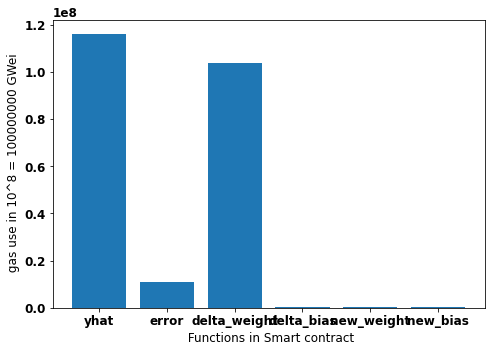

In [121]:
import matplotlib.pyplot as plt
# font = {'family' : 'normal',
#         'size'   : 12}

# plt.rc('font', **font)
functions=['yhat','error','delta_weight','delta_bias','new_weight','new_bias']
fig,ax = plt.subplots()
ax = fig.add_axes([0,0,1,1])
ax.bar(functions,data)
# ax.ticklabel_format(style='plain')
plt.ylabel(" gas use in 10^8 = 100000000 GWei")
plt.xlabel(" Functions in Smart contract" )
plt.show()

In [106]:
# import matplotlib.pyplot as plt
# functions=['yhat','error','delta_weight','delta_bias','new_weight','new_bias']
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# ax.bar(functions,data)
# plt.ylabel(" gas use in GWei")
# plt.xlabel(" Functions in Smart contract")
# plt.show()

from matplotlib.figure import Figure
from matplotlib.ticker import MaxNLocator

fg = Figure()
ax = fg.gca()
ax.plot(functions,data)

ax.yaxis.set_major_locator(MaxNLocator(integer=True))

ax.show()

AttributeError: 'AxesSubplot' object has no attribute 'show'